# Import

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [3]:
raw_df = gpd.read_file("datasets/3_combined/df.gpkg")
raw_fe_df = gpd.read_file("datasets/3_combined/df_with_fe.gpkg")

In [4]:
df = raw_df.copy()
fe_df = raw_fe_df.copy()

# Define outliers

In [3]:
def calculate_outliers(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[col][(df[col] <= lower_bound) | (df[col] >= upper_bound)]
    return outliers

# Calculate health outliers

In [4]:
vg_outliers = calculate_outliers(df, "very_good_health")
print(len(vg_outliers))

142


# Plot health outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d34177f610>,
 'caps': [<matplotlib.lines.Line2D at 0x1d34177f890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d34177f4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d34177fb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d34177fc50>],
 'means': []}

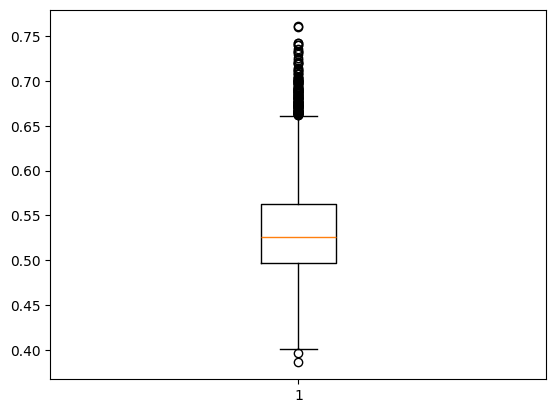

In [9]:
plt.boxplot(df["very_good_health"])

# Plot health distribution

(array([  20.,  193., 1006., 1501.,  972.,  499.,  270.,  132.,   53.,
          13.]),
 array([0.38580931, 0.42330246, 0.4607956 , 0.49828874, 0.53578188,
        0.57327503, 0.61076817, 0.64826131, 0.68575446, 0.7232476 ,
        0.76074074]),
 <BarContainer object of 10 artists>)

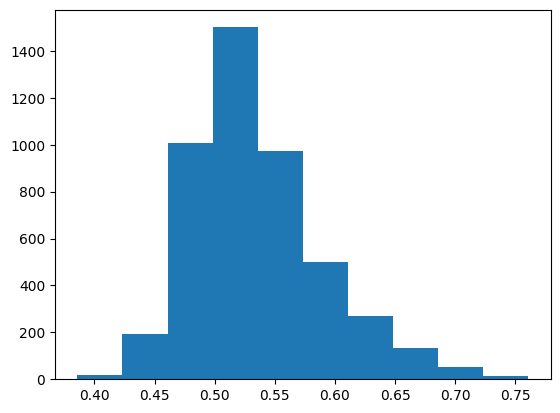

In [29]:
plt.hist(df["very_good_health"])

# Calculate greenspace proportion outliers

In [10]:
gp_outliers = calculate_outliers(df, "greenspace_proportion")
print(len(gp_outliers))

304


# Plot greenspace proportion outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3417db890>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3417dbb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3417db750>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3417dbd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3417dbed0>],
 'means': []}

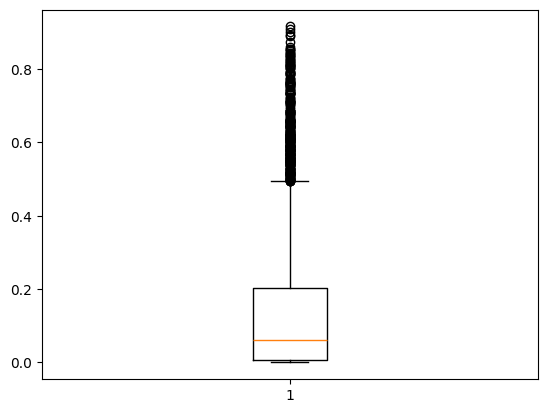

In [11]:
plt.boxplot(df["greenspace_proportion"])

# Plot greenspace proportion distribution

(array([2685.,  708.,  404.,  296.,  189.,  138.,  107.,   61.,   50.,
          21.]),
 array([0.        , 0.09156631, 0.18313262, 0.27469893, 0.36626524,
        0.45783155, 0.54939786, 0.64096417, 0.73253048, 0.82409679,
        0.91566309]),
 <BarContainer object of 10 artists>)

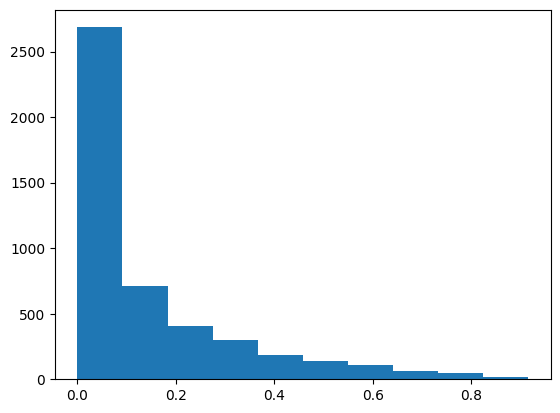

In [12]:
plt.hist(df["greenspace_proportion"])

# Check collinearity

In [6]:
drop_cols = ["lsoa", "very_good_health", "good_health", "fair_health", "bad_health", "very_bad_health", "total_area", "greenspace_area", "geometry"]

In [ ]:
coll_df = df.copy()
coll_df = df.drop(columns = drop_cols)

In [7]:
coll_fe_df = fe_df.copy()
coll_fe_df = fe_df.drop(columns = drop_cols)

In [42]:
vif_data = pd.DataFrame()
vif_data["Feature"] = coll_df.columns
vif_data["VIF"] = [variance_inflation_factor(coll_df.values, i) for i in range (coll_df.shape[1])]

In [10]:
vif_fe_data = pd.DataFrame()
vif_fe_data["Feature"] = coll_fe_df.columns
vif_fe_data["VIF"] = [variance_inflation_factor(coll_fe_df.values, i) for i in range (coll_fe_df.shape[1])]

In [11]:
vif_fe_data.head(20)

,Feature,VIF
0,white_british,72351.346112
1,white_irish,192.810480
2,white_gypsy/irish_traveller,2.922503
3,white_roma,16.790979
4,white_other,10304.903065
5,mixed_white_and_asian,102.946048
6,mixed_white_and_black_african,45.702039
7,mixed_white_and_black_caribbean,128.544997
8,mixed_other,181.348818
9,asian_bangladeshi,2513.635628


In [29]:
vif_data.to_csv("outputs/vif_data.csv", index=0)

In [12]:
vif_fe_data.to_csv("outputs/vif_fe_data.csv", index=0)